In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_img = x_train[0]

In [6]:
single_img.shape

(28, 28)

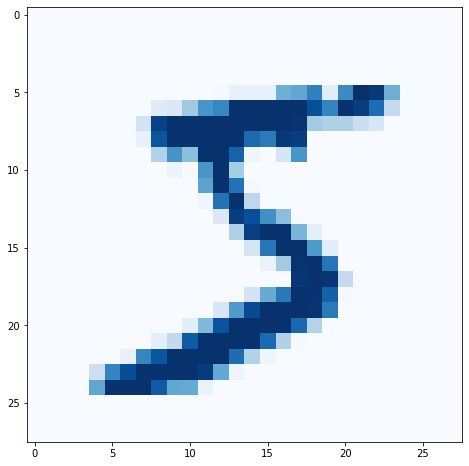

In [7]:
plt.imshow(single_img, cmap='Blues')

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, num_classes = 10)
y_cat_train = to_categorical(y_train, 10)

In [15]:
single_img.min()

0

In [16]:
x_train = x_train/255

In [17]:
x_test = x_test/255

In [18]:
scaled_image = x_train[0]

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
# batchSize, Width, Height, ColorChannels
x_train = x_train.reshape(60000,28,28,1)

In [21]:
x_test = x_test.reshape(10000,28,28,1)

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

model.add(Conv2D(filters=32,
                kernel_size=(4,4), 
                padding='valid',
                input_shape=(28,28,1),
                activation='relu' ))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#op layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [27]:
model.fit(x_train, y_cat_train, epochs=10,
          validation_data=(x_test, y_cat_test),
          callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 49s 820us/sample - loss: 0.1418 - accuracy: 0.9570 - val_loss: 0.0525 - val_accuracy: 0.9828
Epoch 2/10
60000/60000 [==============================] - 43s 723us/sample - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.0468 - val_accuracy: 0.9835
Epoch 3/10
60000/60000 [==============================] - 41s 683us/sample - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0491 - val_accuracy: 0.9848


In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

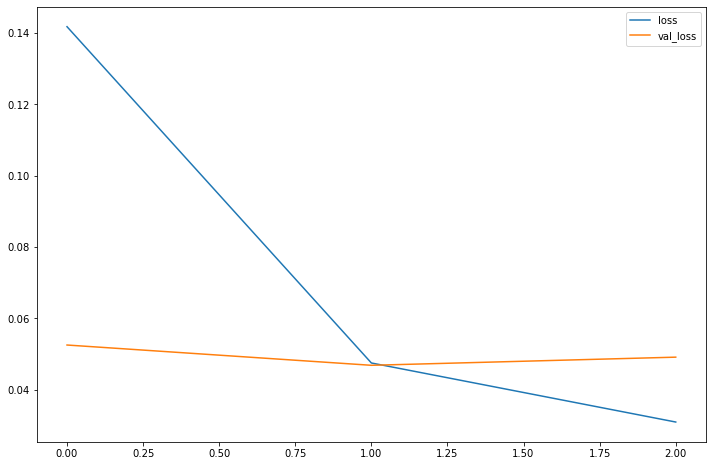

In [30]:
metrics[['loss','val_loss']].plot()

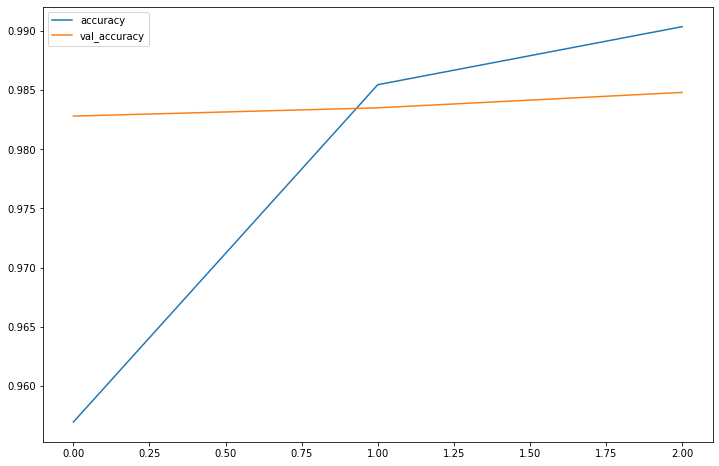

In [31]:
metrics[['accuracy','val_accuracy']].plot()

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 3s 286us/sample - loss: 0.0491 - accuracy: 0.9848


[0.049114765920426, 0.9848]

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
predictions = model.predict_classes(x_test)

In [37]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.97      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [38]:
print(confusion_matrix(y_test, predictions))

[[ 978    0    0    1    0    0    0    0    1    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   1    2 1021    1    0    0    0    7    0    0]
 [   0    0    2 1002    0    2    0    2    1    1]
 [   2    0    2    0  970    0    0    0    1    7]
 [   2    0    1   11    0  876    2    0    0    0]
 [  15    5    1    1    3    3  928    0    2    0]
 [   0    2    8    1    0    0    0 1016    1    0]
 [   5    2    2    2    1    2    0    6  947    7]
 [   2    4    1    2   10    2    0   11    0  977]]


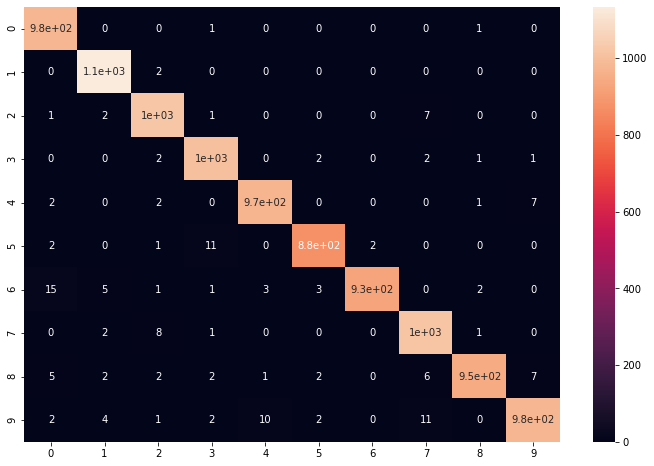

In [40]:
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

In [41]:
testNum = x_test[0]

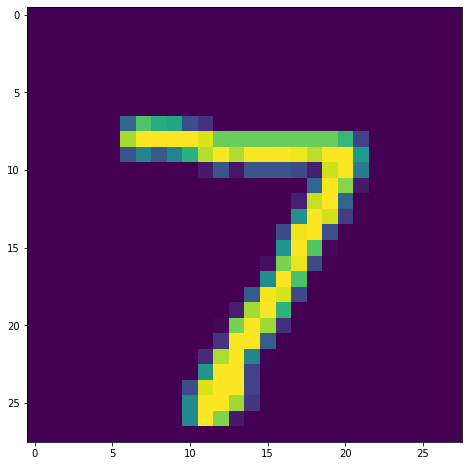

In [42]:
plt.imshow(testNum.reshape(28,28))

In [43]:
model.predict_classes(testNum.reshape(1,28,28,1))[0]

array([7], dtype=int64)